In [44]:
import pandas as pd
import numpy as np
from pylab import *
import matplotlib.pyplot as plt

In [45]:
data=pd.read_csv("data10.csv")

In [46]:
x=np.array(data['x'])
y=np.array(data['y'])



In [47]:
def split(x,y):
    n =240//4
    trainx = np.zeros(240-n)
    trainy = np.zeros(240-n)
    testx = np.zeros(n)
    testy = np.zeros(n)
    
    indtrain =0
    
    indtest =0
    for a in range(240):
        if (a % 4 !=0 ):
            trainx[indtrain]=x[a]
            trainy[indtrain]=y[a]
            indtrain=indtrain+1

        else : 
            testx[indtest]=x[a]
            testy[indtest]=y[a]
            indtest=indtest+1
    
    return trainx,trainy ,testx , testy
    

In [48]:
trainx,trainy,  testx,testy = split(x,y)

In [49]:
def normalize(x):
  X = np.zeros(len(x))
  for i in range (len(x)):
    X[i] = (x[i] - np.mean(trainy))/ sqrt((np.var(trainy)))
  return X

def normalize_x(x):
  X = np.zeros(len(x))
  for i in range (len(x)):
    X[i] = (x[i] - np.mean(trainx))/ sqrt((np.var(x)))
  return X

In [50]:
def recupere(x):
  y=np.zeros(len(x))
  for i in range(len(x)):
    s=1/(1+exp(-x[i]))
    if s>0.5:
      y[i]=1
    else:
      y[i]=0
  return y

In [51]:
def h( x ,  theta ):
  return theta[0]+theta[1]*x 

In [52]:
def calculate_prediction(x, theta ):
  prediction = np.zeros(len(x))
  for i in range(0,len(x)):
    prediction[i]= h(x[i],theta)
  return prediction


In [54]:
def logisticregression(x,y):
  pas=0.01
  theta=np.zeros(2)
  s=np.ones(2)
  nor=np.linalg.norm(s)
  while(nor>0.01):
    p=-calculate_prediction(x,theta)
    pred  = 1/(1+ exp(p));
    err = pred-y;
    s[0]=sum(err)/len(x)
    s[1]=(np.dot(err,x))/len(x);
    theta=theta-pas*s
    nor=np.linalg.norm(s)
    #print(nor)
  return theta

In [55]:
yy=recupere(trainy)
ll =logisticregression(normalize_x(trainx),yy)



ll


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


array([-0.14825577,  1.88315996])

In [27]:
ll

array([-0.14825577,  1.88315996])

In [56]:
def new_y(x,w):
  y=np.zeros(len(x))
  for i in range(len(x)):
    s=1/(1+exp(w[0] -w[1]*x[i]))
    if s>0.5:
      y[i]=1
     
    else:
      y[i]=0
      
  return y

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


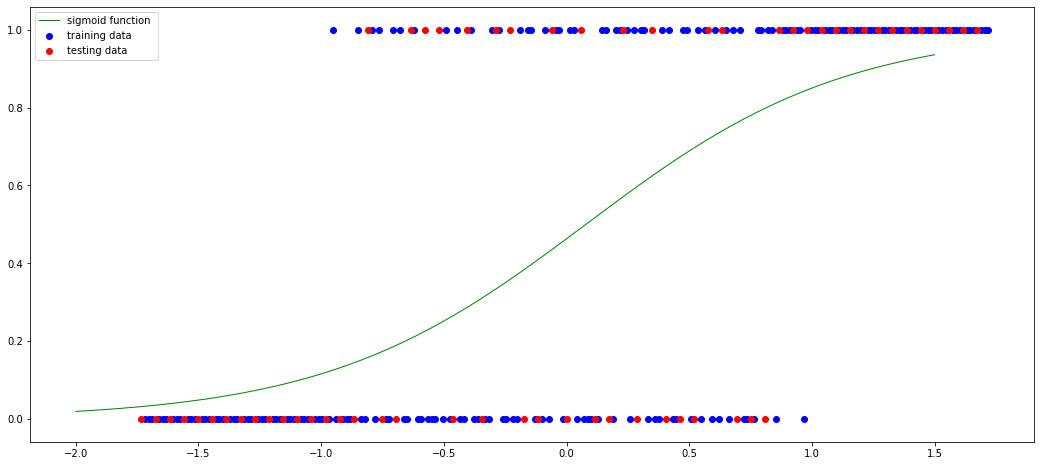

In [57]:
plt.figure(figsize=(18,8))
plt.scatter(normalize_x(trainx),recupere(trainy),color='blue',label = "training data")
plt.scatter(normalize_x(testx),recupere(testy),color='red',label = "testing data")

l = np.linspace(-2, 1.5, 200)


yl= 1/(1+exp(-calculate_prediction(l, ll)))

plt.legend()


plt.plot(l,yl,color='green',lw=1, label = "sigmoid function ")

plt.legend()


plt.show()


